In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from scipy import stats
import researchpy as rp
import statsmodels.api as sm
import pylab
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
from statsmodels.formula.api import ols



In [2]:
df = pd.read_csv('Movies2018.csv')

In [3]:
df.head()

,popularity,vote_count_x,vote_average_x,release_date,original_language_x,genre_ids,belongs_to_collection,budget,production_companies,production_countries,revenue,day_of_week,month,quarter,en_int_lang,collection
0,82.250,16683.0,8.3,2018-04-25,en,Adventure|Action|Science Fiction|,The Avengers Collection,300000000.0,Marvel Studios,US,2.046240e+09,2,4,2,en,Collection
1,38.895,14192.0,7.4,2018-02-13,en,Adventure|Fantasy|Action|Science Fiction|,Black Panther Collection,200000000.0,Marvel Studios,US,1.346739e+09,1,2,1,en,Collection
2,31.957,6878.0,6.5,2018-06-06,en,Adventure|Action|Science Fiction|,Jurassic Park Collection,170000000.0,Amblin Entertainment,US,1.303460e+09,2,6,2,en,Collection
3,30.431,7607.0,7.5,2018-06-14,en,Adventure|Animation|Action|Family|,The Incredibles Collection,200000000.0,Walt Disney Pictures,US,1.241891e+09,3,6,2,en,Collection
4,31.991,7849.0,6.8,2018-12-07,en,Adventure|Fantasy|Action|,Aquaman Collection,160000000.0,DC Comics,AU,1.143689e+09,4,12,4,en,Collection


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
popularity               10000 non-null float64
vote_count_x             10000 non-null float64
vote_average_x           10000 non-null float64
release_date             10000 non-null object
original_language_x      10000 non-null object
genre_ids                10000 non-null object
belongs_to_collection    278 non-null object
budget                   9996 non-null float64
production_companies     10000 non-null object
production_countries     10000 non-null object
revenue                  9996 non-null float64
day_of_week              10000 non-null int64
month                    10000 non-null int64
quarter                  10000 non-null int64
en_int_lang              10000 non-null object
collection               10000 non-null object
dtypes: float64(5), int64(3), object(8)
memory usage: 1.2+ MB


In [5]:
df.shape

(10000, 16)

In [6]:
df.production_companies.value_counts()

na                                 4767
Hallmark Entertainment               40
ARTE                                 28
Lifetime                             22
HBO                                  17
                                   ... 
Saxonia Entertainment                 1
INGO Productions                      1
Art Films Production                  1
Vysakh Udayakrishna Productions       1
Plan Secreto                          1
Name: production_companies, Length: 4086, dtype: int64

In [7]:
df_revenue = df[(df.revenue != 0) & (df.budget != 0)]

In [8]:
df_revenue = df_revenue.loc[df.budget.notnull()]

In [9]:
df_revenue

,popularity,vote_count_x,vote_average_x,release_date,original_language_x,genre_ids,belongs_to_collection,budget,production_companies,production_countries,revenue,day_of_week,month,quarter,en_int_lang,collection
0,82.250,16683.0,8.3,2018-04-25,en,Adventure|Action|Science Fiction|,The Avengers Collection,300000000.0,Marvel Studios,US,2.046240e+09,2,4,2,en,Collection
1,38.895,14192.0,7.4,2018-02-13,en,Adventure|Fantasy|Action|Science Fiction|,Black Panther Collection,200000000.0,Marvel Studios,US,1.346739e+09,1,2,1,en,Collection
2,31.957,6878.0,6.5,2018-06-06,en,Adventure|Action|Science Fiction|,Jurassic Park Collection,170000000.0,Amblin Entertainment,US,1.303460e+09,2,6,2,en,Collection
3,30.431,7607.0,7.5,2018-06-14,en,Adventure|Animation|Action|Family|,The Incredibles Collection,200000000.0,Walt Disney Pictures,US,1.241891e+09,3,6,2,en,Collection
4,31.991,7849.0,6.8,2018-12-07,en,Adventure|Fantasy|Action|,Aquaman Collection,160000000.0,DC Comics,AU,1.143689e+09,4,12,4,en,Collection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,0.600,0.0,0.0,2018-02-12,en,Adventure|Crime|Documentary|,NaN,5.0,Dale Dudes Productions,US,5.000000e+00,0,2,1,en,Non_Collection
402,0.651,1.0,7.0,2018-07-19,en,Horror|Comedy|,NaN,69.0,ODDYSS3Y,US,4.000000e+00,3,7,3,en,Non_Collection
404,0.600,1.0,10.0,2018-05-10,en,na|,NaN,500.0,na,na,2.000000e+00,3,5,2,en,Non_Collection
405,0.645,1.0,10.0,2018-03-17,en,na|,NaN,14.0,na,na,1.000000e+00,5,3,1,en,Non_Collection


In [10]:
df_revenue.reset_index(inplace=True)

In [11]:
df_revenue

,index,popularity,vote_count_x,vote_average_x,release_date,original_language_x,genre_ids,belongs_to_collection,budget,production_companies,production_countries,revenue,day_of_week,month,quarter,en_int_lang,collection
0,0,82.250,16683.0,8.3,2018-04-25,en,Adventure|Action|Science Fiction|,The Avengers Collection,300000000.0,Marvel Studios,US,2.046240e+09,2,4,2,en,Collection
1,1,38.895,14192.0,7.4,2018-02-13,en,Adventure|Fantasy|Action|Science Fiction|,Black Panther Collection,200000000.0,Marvel Studios,US,1.346739e+09,1,2,1,en,Collection
2,2,31.957,6878.0,6.5,2018-06-06,en,Adventure|Action|Science Fiction|,Jurassic Park Collection,170000000.0,Amblin Entertainment,US,1.303460e+09,2,6,2,en,Collection
3,3,30.431,7607.0,7.5,2018-06-14,en,Adventure|Animation|Action|Family|,The Incredibles Collection,200000000.0,Walt Disney Pictures,US,1.241891e+09,3,6,2,en,Collection
4,4,31.991,7849.0,6.8,2018-12-07,en,Adventure|Fantasy|Action|,Aquaman Collection,160000000.0,DC Comics,AU,1.143689e+09,4,12,4,en,Collection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,400,0.600,0.0,0.0,2018-02-12,en,Adventure|Crime|Documentary|,NaN,5.0,Dale Dudes Productions,US,5.000000e+00,0,2,1,en,Non_Collection
256,402,0.651,1.0,7.0,2018-07-19,en,Horror|Comedy|,NaN,69.0,ODDYSS3Y,US,4.000000e+00,3,7,3,en,Non_Collection
257,404,0.600,1.0,10.0,2018-05-10,en,na|,NaN,500.0,na,na,2.000000e+00,3,5,2,en,Non_Collection
258,405,0.645,1.0,10.0,2018-03-17,en,na|,NaN,14.0,na,na,1.000000e+00,5,3,1,en,Non_Collection


In [12]:
df_revenue.drop(columns ='index', inplace=True)

In [13]:
df_revenue

,popularity,vote_count_x,vote_average_x,release_date,original_language_x,genre_ids,belongs_to_collection,budget,production_companies,production_countries,revenue,day_of_week,month,quarter,en_int_lang,collection
0,82.250,16683.0,8.3,2018-04-25,en,Adventure|Action|Science Fiction|,The Avengers Collection,300000000.0,Marvel Studios,US,2.046240e+09,2,4,2,en,Collection
1,38.895,14192.0,7.4,2018-02-13,en,Adventure|Fantasy|Action|Science Fiction|,Black Panther Collection,200000000.0,Marvel Studios,US,1.346739e+09,1,2,1,en,Collection
2,31.957,6878.0,6.5,2018-06-06,en,Adventure|Action|Science Fiction|,Jurassic Park Collection,170000000.0,Amblin Entertainment,US,1.303460e+09,2,6,2,en,Collection
3,30.431,7607.0,7.5,2018-06-14,en,Adventure|Animation|Action|Family|,The Incredibles Collection,200000000.0,Walt Disney Pictures,US,1.241891e+09,3,6,2,en,Collection
4,31.991,7849.0,6.8,2018-12-07,en,Adventure|Fantasy|Action|,Aquaman Collection,160000000.0,DC Comics,AU,1.143689e+09,4,12,4,en,Collection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.600,0.0,0.0,2018-02-12,en,Adventure|Crime|Documentary|,NaN,5.0,Dale Dudes Productions,US,5.000000e+00,0,2,1,en,Non_Collection
256,0.651,1.0,7.0,2018-07-19,en,Horror|Comedy|,NaN,69.0,ODDYSS3Y,US,4.000000e+00,3,7,3,en,Non_Collection
257,0.600,1.0,10.0,2018-05-10,en,na|,NaN,500.0,na,na,2.000000e+00,3,5,2,en,Non_Collection
258,0.645,1.0,10.0,2018-03-17,en,na|,NaN,14.0,na,na,1.000000e+00,5,3,1,en,Non_Collection


In [14]:
df_revenue['profitable'] = df_revenue.revenue - df_revenue.budget

In [15]:
df_revenue.loc[df_revenue.profitable > 0, 'profitable'] = 1
df_revenue.loc[df_revenue.profitable <= 0, 'profitable'] = 0

In [16]:
df_revenue

,popularity,vote_count_x,vote_average_x,release_date,original_language_x,genre_ids,belongs_to_collection,budget,production_companies,production_countries,revenue,day_of_week,month,quarter,en_int_lang,collection,profitable
0,82.250,16683.0,8.3,2018-04-25,en,Adventure|Action|Science Fiction|,The Avengers Collection,300000000.0,Marvel Studios,US,2.046240e+09,2,4,2,en,Collection,1.0
1,38.895,14192.0,7.4,2018-02-13,en,Adventure|Fantasy|Action|Science Fiction|,Black Panther Collection,200000000.0,Marvel Studios,US,1.346739e+09,1,2,1,en,Collection,1.0
2,31.957,6878.0,6.5,2018-06-06,en,Adventure|Action|Science Fiction|,Jurassic Park Collection,170000000.0,Amblin Entertainment,US,1.303460e+09,2,6,2,en,Collection,1.0
3,30.431,7607.0,7.5,2018-06-14,en,Adventure|Animation|Action|Family|,The Incredibles Collection,200000000.0,Walt Disney Pictures,US,1.241891e+09,3,6,2,en,Collection,1.0
4,31.991,7849.0,6.8,2018-12-07,en,Adventure|Fantasy|Action|,Aquaman Collection,160000000.0,DC Comics,AU,1.143689e+09,4,12,4,en,Collection,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.600,0.0,0.0,2018-02-12,en,Adventure|Crime|Documentary|,NaN,5.0,Dale Dudes Productions,US,5.000000e+00,0,2,1,en,Non_Collection,0.0
256,0.651,1.0,7.0,2018-07-19,en,Horror|Comedy|,NaN,69.0,ODDYSS3Y,US,4.000000e+00,3,7,3,en,Non_Collection,0.0
257,0.600,1.0,10.0,2018-05-10,en,na|,NaN,500.0,na,na,2.000000e+00,3,5,2,en,Non_Collection,0.0
258,0.645,1.0,10.0,2018-03-17,en,na|,NaN,14.0,na,na,1.000000e+00,5,3,1,en,Non_Collection,0.0


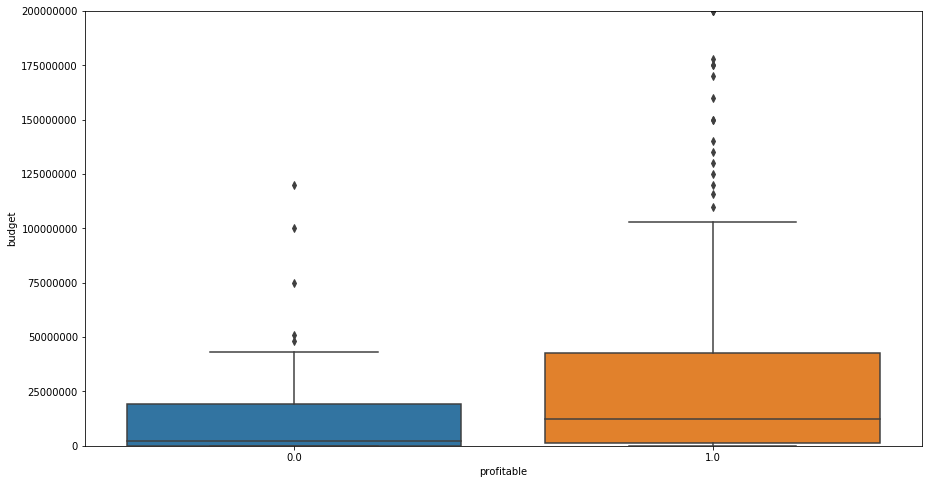

In [17]:
plt.figure(figsize=(15,8))
plt.ylim(top=200000000)
plt.ticklabel_format(style='plain')
# plt.show()
sns.boxplot(x="profitable", y="budget", data=df_revenue)

In [18]:
df_revenue.groupby('profitable')['budget'].describe()

,count,mean,std,min,25%,50%,75%,max
profitable,,,,,,,,
0.0,86.0,1.301122e+07,2.208137e+07,5.0,3250.0,2170000.0,19000000.00,120000000.0
1.0,174.0,3.581609e+07,5.420961e+07,1.0,1501177.5,12250000.0,42802059.75,300000000.0


In [19]:
df_profitable = df_revenue[df_revenue['profitable'] ==1]
df_not_profitable = df_revenue[df_revenue['profitable'] ==0]

In [20]:
df_profitable.shape

(174, 17)

In [21]:
df_not_profitable.shape

(86, 17)

In [22]:
# Levene's test for homogeneity of variance  is significant 
# so should conduct Welch's T-Test instead of students T-Test
stats.levene(df_profitable['budget'], df_not_profitable['budget'])



LeveneResult(statistic=13.066944691228477, pvalue=0.0003613344765608587)

In [23]:
# diff = df_profitable['budget'] - df_not_profitable['budget']

stats.shapiro(df_profitable['budget'])


(0.6919406652450562, 1.2402933047438534e-17)

In [24]:
stats.shapiro(df_not_profitable['budget'])

(0.6476919054985046, 4.692994582354559e-13)

In [25]:
stats.ttest_ind(df_profitable['budget'], df_not_profitable['budget'], equal_var = False)

Ttest_indResult(statistic=4.801441422553901, pvalue=2.7088644798051934e-06)

In [146]:
def welch_ttest(x, y): 
    ## Welch-Satterthwaite Degrees of Freedom ##
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
   
    t, p = stats.ttest_ind(x, y, equal_var = False)
    
    print("\n",
          f"Welch's t-test= {t:.4f}", "\n",
          f"p-value = {p:.8f}", "\n",
          f"Welch-Satterthwaite Degrees of Freedom= {dof:.4f}")

welch_ttest(df_profitable['budget'], df_not_profitable['budget'])


 Welch's t-test= 4.8014 
 p-value = 0.00000271 
 Welch-Satterthwaite Degrees of Freedom= 251.0629


In [27]:
stats.shapiro(df_revenue['budget'])

(0.6416126489639282, 5.0317691632470354e-23)

In [28]:
stats.shapiro(df_revenue['revenue'])

(0.4618762135505676, 2.69166447542904e-27)

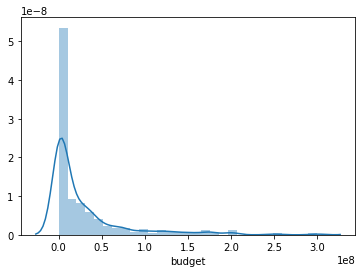

In [29]:
# plt.ticklabel_format(style='plain')
sns.distplot(df_revenue['budget'])

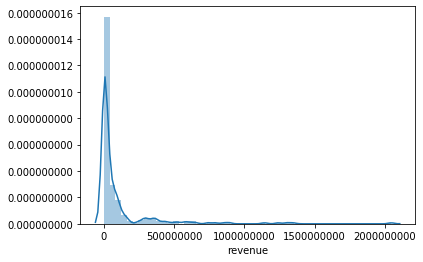

In [30]:
plt.ticklabel_format(style='plain')
sns.distplot(df_revenue['revenue'])

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.8570187091827393, 0.0)

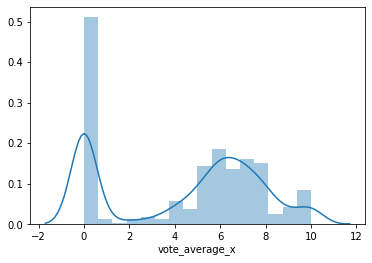

In [31]:

sns.distplot(df['vote_average_x'])
stats.shapiro(df['vote_average_x'])

In [32]:
df_revenue['genre_ids'].value_counts().nlargest(20, keep='all')

Drama|                                       21
Comedy|                                      18
Drama|Comedy|                                12
na|                                           6
Action|Thriller|Crime|                        6
Drama|Action|                                 6
Action|Science Fiction|                       5
Horror|Thriller|                              5
Drama|Romance|                                5
Comedy|Romance|                               5
Drama|Crime|                                  5
Drama|Comedy|Romance|                         5
Drama|Action|Thriller|Crime|                  5
Horror|Thriller|Mystery|                      4
Adventure|Animation|Comedy|Family|            3
Drama|History|Thriller|                       3
Action|                                       3
Drama|Thriller|Mystery|                       3
Action|Thriller|                              3
Adventure|Fantasy|Action|Science Fiction|     3
Adventure|Drama|                        

In [33]:
df_genre = df_revenue[(df_revenue['genre_ids'].value_counts()>4) & (df_revenue['genre_ids'] != 'na')]

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [34]:
df_genre

,popularity,vote_count_x,vote_average_x,release_date,original_language_x,genre_ids,belongs_to_collection,budget,production_companies,production_countries,revenue,day_of_week,month,quarter,en_int_lang,collection,profitable


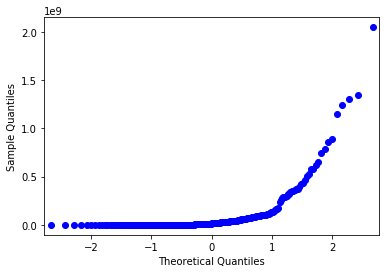

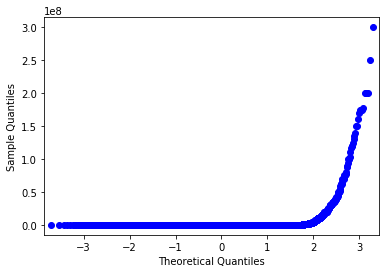

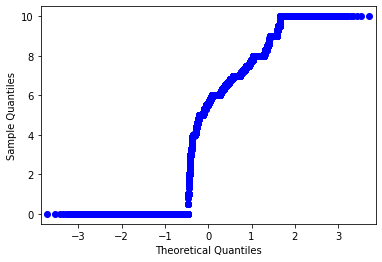

In [35]:

sm.qqplot(df_revenue['revenue'])
sm.qqplot(df['budget'])
sm.qqplot(df['vote_average_x'])
pylab.show()

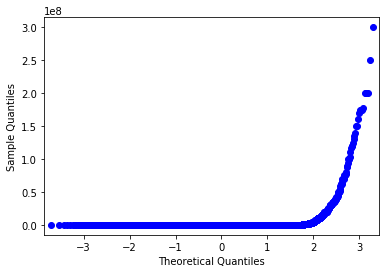

In [36]:
sm.qqplot(df['budget'])
pylab.show()

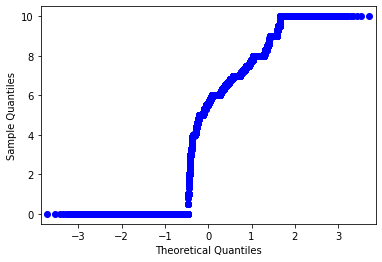

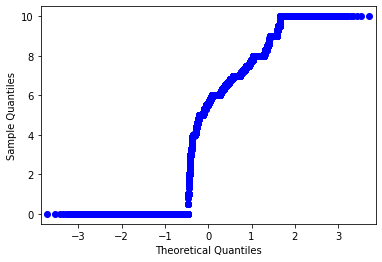

In [37]:
sm.qqplot(df['vote_average_x'])

In [38]:
df_test = df[(df['vote_average_x'] != 0) & (df['vote_count_x'] >30)]

In [39]:
df_test

,popularity,vote_count_x,vote_average_x,release_date,original_language_x,genre_ids,belongs_to_collection,budget,production_companies,production_countries,revenue,day_of_week,month,quarter,en_int_lang,collection
0,82.250,16683.0,8.3,2018-04-25,en,Adventure|Action|Science Fiction|,The Avengers Collection,300000000.0,Marvel Studios,US,2.046240e+09,2,4,2,en,Collection
1,38.895,14192.0,7.4,2018-02-13,en,Adventure|Fantasy|Action|Science Fiction|,Black Panther Collection,200000000.0,Marvel Studios,US,1.346739e+09,1,2,1,en,Collection
2,31.957,6878.0,6.5,2018-06-06,en,Adventure|Action|Science Fiction|,Jurassic Park Collection,170000000.0,Amblin Entertainment,US,1.303460e+09,2,6,2,en,Collection
3,30.431,7607.0,7.5,2018-06-14,en,Adventure|Animation|Action|Family|,The Incredibles Collection,200000000.0,Walt Disney Pictures,US,1.241891e+09,3,6,2,en,Collection
4,31.991,7849.0,6.8,2018-12-07,en,Adventure|Fantasy|Action|,Aquaman Collection,160000000.0,DC Comics,AU,1.143689e+09,4,12,4,en,Collection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6505,5.150,34.0,3.7,2018-12-14,en,Thriller|Science Fiction|,NaN,0.0,Spoke Lane Entertainment,US,0.000000e+00,4,12,4,en,Non_Collection
6506,5.406,32.0,3.7,2018-05-04,en,Action|Thriller|Science Fiction|,NaN,0.0,Premiere Entertainment Group,US,0.000000e+00,4,5,2,en,Non_Collection
6518,9.340,927.0,3.7,2018-01-19,en,Horror|Thriller|,NaN,0.0,na,US,0.000000e+00,4,1,1,en,Non_Collection
6554,36.024,43.0,3.6,2018-08-20,en,Adventure|Action|Science Fiction|,NaN,0.0,Dual Visions,US,0.000000e+00,0,8,3,en,Non_Collection


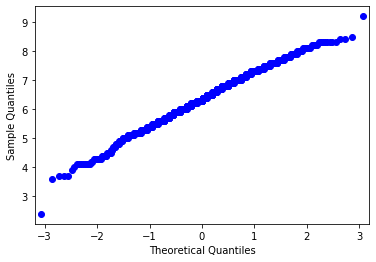

In [40]:
sm.qqplot(df_test['vote_average_x'])
pylab.show()

(0.9939461946487427, 0.0008238866575993598)

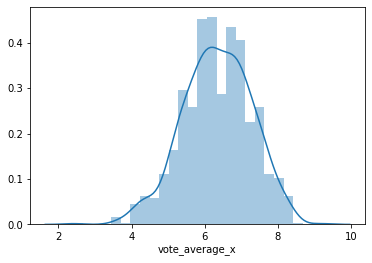

In [41]:

sns.distplot(df_test['vote_average_x'])
stats.shapiro(df_test['vote_average_x'])

In [42]:
df_revenue_test = df_revenue[(df_revenue['budget']>=50000000) & (df_revenue['revenue']>=50000000)]

In [43]:
df_revenue_test.shape

(45, 17)

(0.8893096446990967, 0.0004477008187677711)

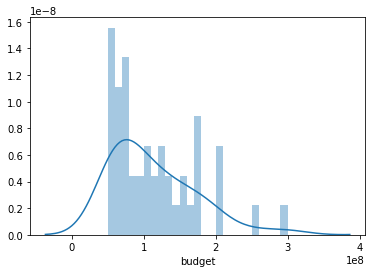

In [44]:
df_revenue_test['revenue']


# plt.ticklabel_format(style='plain')
sns.distplot(df_revenue_test['budget'], bins=25)
stats.shapiro(df_revenue_test['budget'])


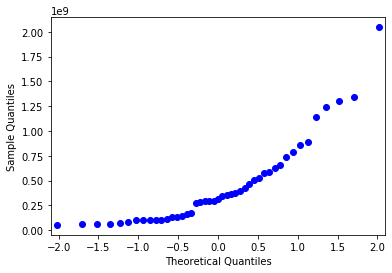

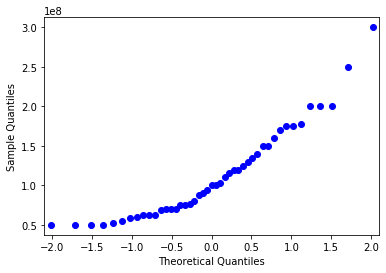

In [45]:
sm.qqplot(df_revenue_test['revenue'])
sm.qqplot(df_revenue_test['budget'])

pylab.show()

In [46]:
df_revenue['log_revenue'] = df_revenue['revenue'].apply(np.log)

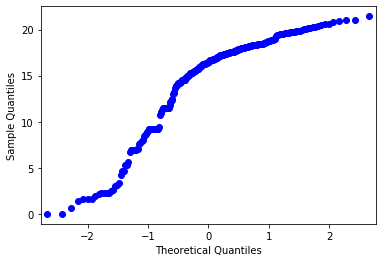

In [47]:
sm.qqplot(df_revenue['log_revenue'])

pylab.show()

In [48]:
stats.shapiro(df_revenue['log_revenue'])

(0.862784206867218, 1.8187574452673168e-14)

In [49]:
df_revenue['revenue_norm'] = (df_revenue.revenue-df_revenue.revenue.mean())/df_revenue.revenue.std()



In [50]:
df_revenue['log_revenue'] = df_revenue.revenue_norm.apply(np.log)

In [51]:
stats.shapiro(df_revenue['log_revenue'])

(nan, 1.0)

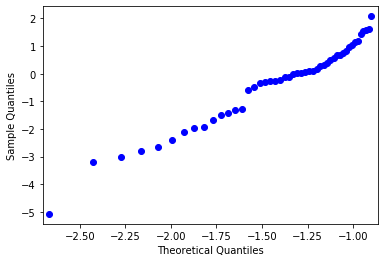

In [52]:
sm.qqplot(df_revenue['log_revenue'])

pylab.show()

In [53]:
df_revenue

,popularity,vote_count_x,vote_average_x,release_date,original_language_x,genre_ids,belongs_to_collection,budget,production_companies,production_countries,revenue,day_of_week,month,quarter,en_int_lang,collection,profitable,log_revenue,revenue_norm
0,82.250,16683.0,8.3,2018-04-25,en,Adventure|Action|Science Fiction|,The Avengers Collection,300000000.0,Marvel Studios,US,2.046240e+09,2,4,2,en,Collection,1.0,2.077842,7.987214
1,38.895,14192.0,7.4,2018-02-13,en,Adventure|Fantasy|Action|Science Fiction|,Black Panther Collection,200000000.0,Marvel Studios,US,1.346739e+09,1,2,1,en,Collection,1.0,1.631691,5.112512
2,31.957,6878.0,6.5,2018-06-06,en,Adventure|Action|Science Fiction|,Jurassic Park Collection,170000000.0,Amblin Entertainment,US,1.303460e+09,2,6,2,en,Collection,1.0,1.596281,4.934649
3,30.431,7607.0,7.5,2018-06-14,en,Adventure|Animation|Action|Family|,The Incredibles Collection,200000000.0,Walt Disney Pictures,US,1.241891e+09,3,6,2,en,Collection,1.0,1.543645,4.681625
4,31.991,7849.0,6.8,2018-12-07,en,Adventure|Fantasy|Action|,Aquaman Collection,160000000.0,DC Comics,AU,1.143689e+09,4,12,4,en,Collection,1.0,1.453497,4.278048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.600,0.0,0.0,2018-02-12,en,Adventure|Crime|Documentary|,NaN,5.0,Dale Dudes Productions,US,5.000000e+00,0,2,1,en,Non_Collection,0.0,NaN,-0.422114
256,0.651,1.0,7.0,2018-07-19,en,Horror|Comedy|,NaN,69.0,ODDYSS3Y,US,4.000000e+00,3,7,3,en,Non_Collection,0.0,NaN,-0.422114
257,0.600,1.0,10.0,2018-05-10,en,na|,NaN,500.0,na,na,2.000000e+00,3,5,2,en,Non_Collection,0.0,NaN,-0.422114
258,0.645,1.0,10.0,2018-03-17,en,na|,NaN,14.0,na,na,1.000000e+00,5,3,1,en,Non_Collection,0.0,NaN,-0.422114


In [54]:
df_revenue.log_revenue.isna().value_counts()

True     212
False     48
Name: log_revenue, dtype: int64

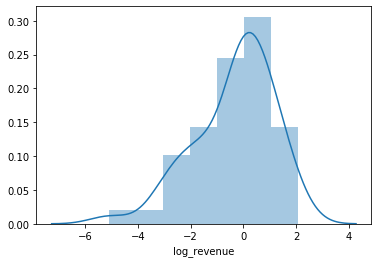

In [55]:
df_norm = df_revenue.loc[df_revenue.log_revenue.notnull()]

sns.distplot(df_norm['log_revenue'])

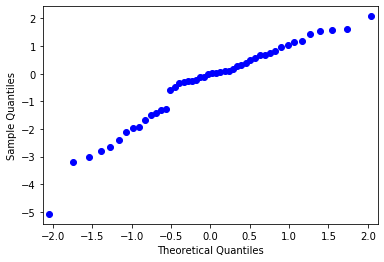

In [109]:
sm.qqplot(df_norm['log_revenue'])

pylab.show()

In [56]:
stats.normaltest(df_norm['log_revenue'])

NormaltestResult(statistic=8.285313020025747, pvalue=0.015880608424481607)

In [57]:
df_norm.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 47
Data columns (total 19 columns):
popularity               48 non-null float64
vote_count_x             48 non-null float64
vote_average_x           48 non-null float64
release_date             48 non-null object
original_language_x      48 non-null object
genre_ids                48 non-null object
belongs_to_collection    30 non-null object
budget                   48 non-null float64
production_companies     48 non-null object
production_countries     48 non-null object
revenue                  48 non-null float64
day_of_week              48 non-null int64
month                    48 non-null int64
quarter                  48 non-null int64
en_int_lang              48 non-null object
collection               48 non-null object
profitable               48 non-null float64
log_revenue              48 non-null float64
revenue_norm             48 non-null float64
dtypes: float64(8), int64(3), object(8)
memory usage: 7.

In [58]:
x = df['revenue'].values

In [59]:
min_max_scaler = preprocessing.MinMaxScaler()

In [60]:
scaler=MinMaxScaler(feature_range=(1,10))
df_norm['test'] = scaler.fit_transform(df_norm[['revenue']])

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
df_norm['test_log'] = df_norm.test.apply(np.log)

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


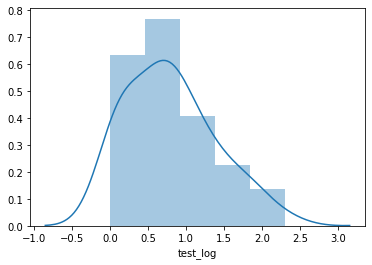

In [62]:
sns.distplot(df_norm.test_log)

In [63]:
stats.shapiro(df_norm.test_log)

(0.9445104598999023, 0.0242781899869442)

In [64]:
# df_revenue.loc[df_revenue.collection == 'Collection', 'collection'] = 1
# df_revenue.loc[df_revenue.collection != 'Collection', 'collection'] = 0

# df_revenue.collection

0          Collection
1          Collection
2          Collection
3          Collection
4          Collection
            ...      
255    Non_Collection
256    Non_Collection
257    Non_Collection
258    Non_Collection
259    Non_Collection
Name: collection, Length: 260, dtype: object

In [69]:
data1 = df_profitable['budget']
data2 = df_not_profitable['budget']

stat, p = mannwhitneyu(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')



Statistics=4902.500, p=0.000
Different distribution (reject H0)


In [84]:

# # compare samples
# stat, p = kruskal(data1, data2, data3)
# print('Statistics=%.3f, p=%.3f' % (stat, p))
# # interpret
# alpha = 0.05
# if p > alpha:
# 	print('Same distributions (fail to reject H0)')
# else:
# 	print('Different distributions (reject H0)')


df_revenue.groupby('month')['budget'].describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,28.0,1.249650e+07,1.879810e+07,1.0,9749.0,1852617.5,18000000.0,62000000.0
2,24.0,2.402409e+07,4.367318e+07,5.0,10000.0,4200000.0,35500000.0,200000000.0
3,25.0,2.970037e+07,4.995467e+07,10.0,10000.0,2900000.0,30000000.0,175000000.0
4,16.0,3.445646e+07,7.678598e+07,10.0,78361.0,6000000.0,20750000.0,300000000.0
5,18.0,2.848592e+07,6.107978e+07,5.0,875750.0,6540000.0,24000000.0,250000000.0
6,23.0,3.005174e+07,5.336522e+07,100.0,2212356.5,10000000.0,20459309.0,200000000.0
7,16.0,4.131244e+07,5.816157e+07,40.0,1375000.0,11500000.0,65250000.0,178000000.0
8,20.0,2.472093e+07,3.622021e+07,127.0,435201.0,14150000.0,32500000.0,150000000.0
9,20.0,2.375213e+07,3.028710e+07,1508.0,4888175.0,11652500.0,29000000.0,116000000.0


In [90]:
mc = MultiComparison(df_revenue['revenue'], df_revenue['month'])

In [100]:
data1 = df_revenue['revenue'][df_revenue['quarter'] == 1]
data2 = df_revenue['revenue'][df_revenue['quarter'] == 2]
data3 = df_revenue['revenue'][df_revenue['quarter'] == 3]
data4 = df_revenue['revenue'][df_revenue['quarter'] == 4]

In [101]:

stat, p = kruskal(data1, data2, data3, data4)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=3.710, p=0.294
Same distributions (fail to reject H0)


In [106]:
data1 = df_revenue['revenue'][df_revenue['month'] == 1]
data2 = df_revenue['revenue'][df_revenue['month'] == 2]
data3 = df_revenue['revenue'][df_revenue['month'] == 3]
data4 = df_revenue['revenue'][df_revenue['month'] == 4]
data5 = df_revenue['revenue'][df_revenue['month'] == 5]
data6 = df_revenue['revenue'][df_revenue['month'] == 6]
data7 = df_revenue['revenue'][df_revenue['month'] == 7]
data8 = df_revenue['revenue'][df_revenue['month'] == 8]
data9 = df_revenue['revenue'][df_revenue['month'] == 9]
data10 = df_revenue['revenue'][df_revenue['month'] == 10]
data11 = df_revenue['revenue'][df_revenue['month'] == 11]
data12 = df_revenue['revenue'][df_revenue['month'] == 12]

In [111]:
stat, p = kruskal(data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=9.011, p=0.621
Same distributions (fail to reject H0)


In [ ]:
data1 = df_revenue['revenue'][df_revenue['day_of_week'] == 0]
data2 = df_revenue['revenue'][df_revenue['day_of_week'] == 1]
data3 = df_revenue['revenue'][df_revenue['day_of_week'] == 2]
data4 = df_revenue['revenue'][df_revenue['day_of_week'] == 3]
data5 = df_revenue['revenue'][df_revenue['day_of_week'] == 4]
data6 = df_revenue['revenue'][df_revenue['day_of_week'] == 5]
data7 = df_revenue['revenue'][df_revenue['day_of_week'] == 6]

In [118]:
stat, p = kruskal(data1, data2, data3, data4, data5, data6, data7)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=3.207, p=0.782
Same distributions (fail to reject H0)


In [221]:
formula = 'revenue ~ C(month) + C(quarter) + C(day_of_week)'
lm = ols(formula, df_revenue).fit()
table = sm.stats.anova_lm(lm)
print(table)


                   df        sum_sq       mean_sq          F        PR(>F)
C(month)         11.0  4.770442e+17  4.336765e+16   0.746546  6.930330e-01
C(quarter)        3.0  4.040794e+18  1.346931e+18  23.186539  3.153860e-13
C(day_of_week)    6.0  7.261070e+17  1.210178e+17   2.083243  5.585634e-02
Residual        242.0  1.405804e+19  5.809108e+16        NaN           NaN


In [144]:
table = sm.stats.anova_lm(lm, typ=2)


def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov=aov[cols]
    
    return aov

anova_table(table)
    

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(month),5.651650e+17,11.0,5.137864e+16,0.884450,0.556238,0.036224,-0.004715
C(quarter),1.786888e+17,3.0,5.956294e+16,1.025337,0.382025,0.011453,0.000282
C(day_of_week),8.001392e+17,6.0,1.333565e+17,2.295645,0.035668,0.051284,0.028837
Residual,1.405804e+19,242.0,5.809108e+16,NaN,NaN,NaN,NaN


In [123]:
mc = MultiComparison(df_revenue['revenue'], df_revenue['day_of_week'])
mc_results = mc.tukeyhsd()
print(mc_results)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
group1 group2     meandiff    p-adj       lower          upper      reject
--------------------------------------------------------------------------
     0      1  108854065.4965 0.8373 -141115868.9013 358823999.8943  False
     0      2  163135783.9147 0.2991   -57226977.549 383498545.3784  False
     0      3   74601717.2185    0.9 -141444902.2976 290648336.7346  False
     0      4   38991655.0463    0.9 -174146727.0564 252130037.1491  False
     0      5   35165058.9692    0.9 -265393439.5442 335723557.4827  False
     0      6  -14346627.9808    0.9 -335438822.4821 306745566.5206  False
     1      2   54281718.4182    0.9 -125974164.7409 234537601.5773  False
     1      3   -34252348.278    0.9  -209205423.638  140700727.082  False
     1      4  -69862410.4502 0.8855 -241211197.1366 101486376.2363  False
     1      5  -73689006.5273    0.9 -346210286.0675 198832273.0129  False
     1      6 -123200693.

In [138]:
df_long_weekend = df_revenue[(df_revenue['day_of_week'] == 4) | (df_revenue['day_of_week'] == 5) |(df_revenue['day_of_week'] == 6)]

In [139]:
df_not_weekend = df_revenue[(df_revenue['day_of_week'] != 4) & (df_revenue['day_of_week'] != 5) &(df_revenue['day_of_week'] != 6)]

In [140]:
df_not_weekend.day_of_week.value_counts()

3    69
2    55
1    22
0    13
Name: day_of_week, dtype: int64

In [141]:
welch_ttest(df_not_weekend['revenue'], df_long_weekend['revenue'])


 Welch's t-test= 2.4862 
 p-value = 0.01354605 
 Welch-Satterthwaite Degrees of Freedom= 257.9901


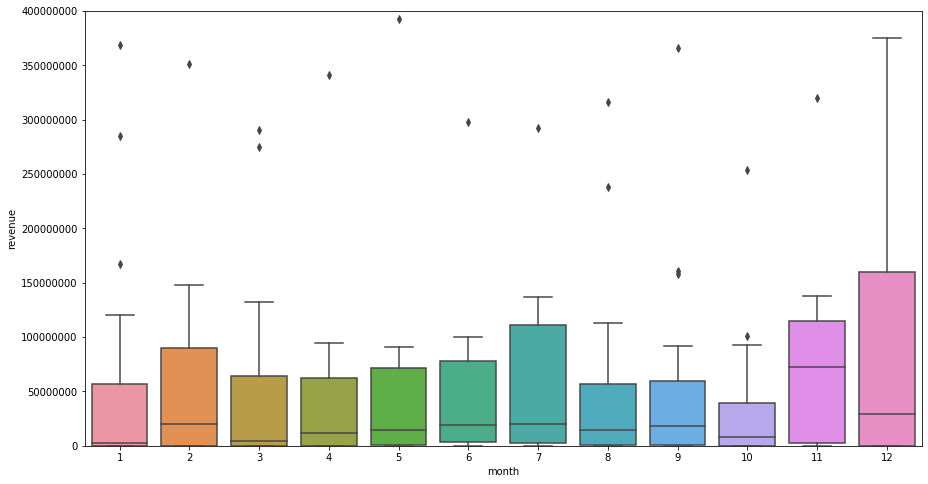

In [147]:
plt.figure(figsize=(15,8))
plt.ylim(top=400000000)
plt.ticklabel_format(style='plain')
sns.boxplot(x="month", y="revenue", data=df_revenue)

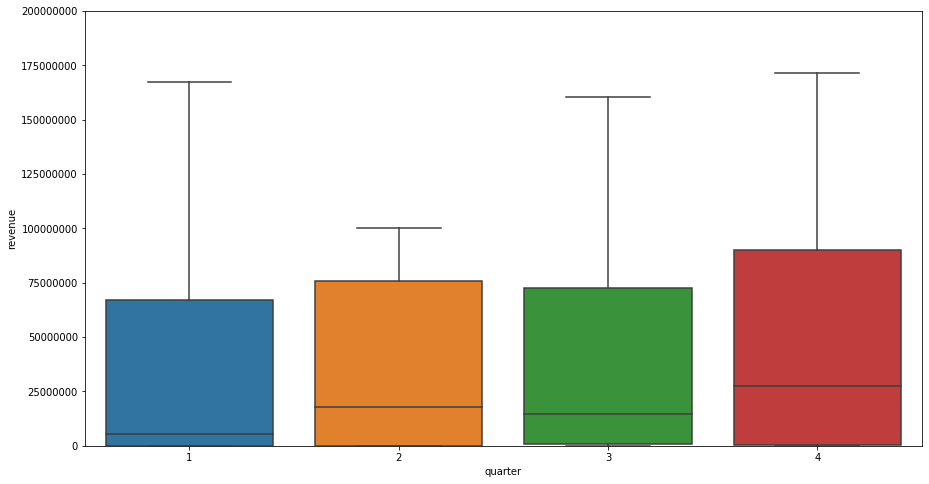

In [149]:
plt.figure(figsize=(15,8))
plt.ylim(top=200000000)
plt.ticklabel_format(style='plain')
sns.boxplot(x="quarter", y="revenue", data=df_revenue)

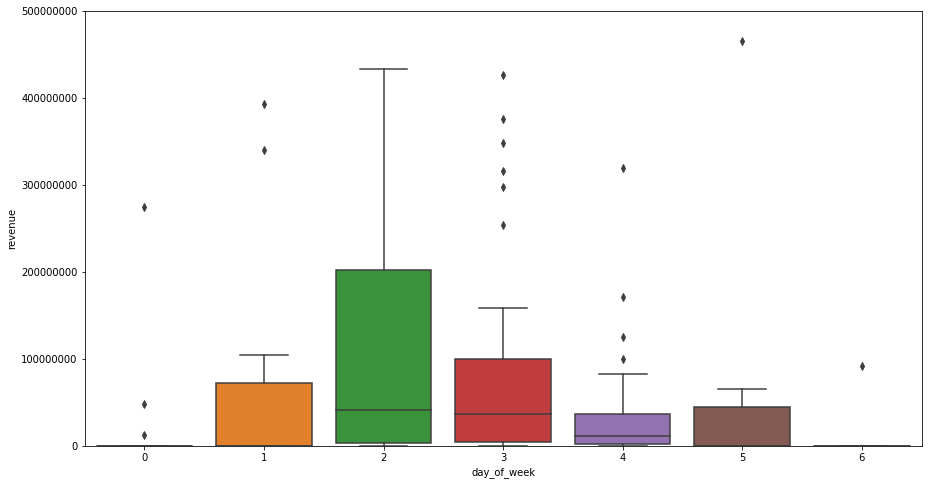

In [153]:
plt.figure(figsize=(15,8))
plt.ylim(top=500000000)
plt.ticklabel_format(style='plain')
sns.boxplot(x="day_of_week", y="revenue", data=df_revenue)

In [154]:

data2 = df_revenue['revenue'][df_revenue['day_of_week'] == 1]
data3 = df_revenue['revenue'][df_revenue['day_of_week'] == 2]
data4 = df_revenue['revenue'][df_revenue['day_of_week'] == 3]
data5 = df_revenue['revenue'][df_revenue['day_of_week'] == 4]
data6 = df_revenue['revenue'][df_revenue['day_of_week'] == 5]

stat, p = kruskal(data2, data3, data4, data5, data6)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=15.824, p=0.003
Different distributions (reject H0)


In [160]:
from scipy.stats import chisquare
import numpy as np
from scipy import stats
from itertools import combinations
from statsmodels.stats.multitest import multipletests
from statsmodels.stats.libqsturng import psturng

import warnings


def kw_dunn(groups, to_compare=None, alpha=0.05, method='bonf'):
    """
    Kruskal-Wallis 1-way ANOVA with Dunn's multiple comparison test
    Arguments:
    ---------------
    groups: sequence
        arrays corresponding to k mutually independent samples from
        continuous populations
    to_compare: sequence
        tuples specifying the indices of pairs of groups to compare, e.g.
        [(0, 1), (0, 2)] would compare group 0 with 1 & 2. by default, all
        possible pairwise comparisons between groups are performed.
    alpha: float
        family-wise error rate used for correcting for multiple comparisons
        (see statsmodels.stats.multitest.multipletests for details)
    method: string
        method used to adjust p-values to account for multiple corrections (see
        statsmodels.stats.multitest.multipletests for options)
    Returns:
    ---------------
    H: float
        Kruskal-Wallis H-statistic
    p_omnibus: float
        p-value corresponding to the global null hypothesis that the medians of
        the groups are all equal
    Z_pairs: float array
        Z-scores computed for the absolute difference in mean ranks for each
        pairwise comparison
    p_corrected: float array
        corrected p-values for each pairwise comparison, corresponding to the
        null hypothesis that the pair of groups has equal medians. note that
        these are only meaningful if the global null hypothesis is rejected.
    reject: bool array
        True for pairs where the null hypothesis can be rejected for the given
        alpha
    Reference:
    ---------------
    Gibbons, J. D., & Chakraborti, S. (2011). Nonparametric Statistical
    Inference (5th ed., pp. 353-357). Boca Raton, FL: Chapman & Hall.
    """

    # omnibus test (K-W ANOVA)
    # -------------------------------------------------------------------------

    groups = [np.array(gg) for gg in groups]

    k = len(groups)

    n = np.array([len(gg) for gg in groups])
    if np.any(n < 5):
        warnings.warn("Sample sizes < 5 are not recommended (K-W test assumes "
                      "a chi square distribution)")

    allgroups = np.concatenate(groups)
    N = len(allgroups)
    ranked = stats.rankdata(allgroups)

    # correction factor for ties
    T = stats.tiecorrect(ranked)
    if T == 0:
        raise ValueError('All numbers are identical in kruskal')

    # sum of ranks for each group
    j = np.insert(np.cumsum(n), 0, 0)
    R = np.empty(k, dtype=np.float)
    for ii in range(k):
        R[ii] = ranked[j[ii]:j[ii + 1]].sum()

    # the Kruskal-Wallis H-statistic
    H = (12. / (N * (N + 1.))) * ((R ** 2.) / n).sum() - 3 * (N + 1)

    # apply correction factor for ties
    H /= T

    df_omnibus = k - 1
    p_omnibus = stats.chi2(H, df_omnibus)

    # multiple comparisons
    # -------------------------------------------------------------------------

    # by default we compare every possible pair of groups
    if to_compare is None:
        to_compare = tuple(combinations(range(k), 2))

    ncomp = len(to_compare)

    Z_pairs = np.empty(ncomp, dtype=np.float)
    p_uncorrected = np.empty(ncomp, dtype=np.float)
    Rmean = R / n

    for pp, (ii, jj) in enumerate(to_compare):

        # standardized score
        Zij = (np.abs(Rmean[ii] - Rmean[jj]) /
               np.sqrt((1. / 12.) * N * (N + 1) * (1. / n[ii] + 1. / n[jj])))
        Z_pairs[pp] = Zij

    # corresponding p-values obtained from upper quantiles of the standard
    # normal distribution
    p_uncorrected = stats.norm.sf(Z_pairs) * 2.

    # correction for multiple comparisons
    reject, p_corrected, alphac_sidak, alphac_bonf = multipletests(
        p_uncorrected, method=method
    )

    return H, p_omnibus, Z_pairs, p_corrected, reject

In [161]:

kw_dunn([data2, data3, data4, data5, data6])

(15.82368776887143,
 array([2.61950943, 2.06163953, 0.67424221, 0.57111183, 0.86317975,
        2.87070134, 2.5557861 , 2.10597841, 2.13551115, 1.13371419]),
 array([0.08805634, 0.39242068, 1.        , 1.        , 1.        ,
        0.04095623, 0.10594822, 0.35206228, 0.3271928 , 1.        ]),
 array([False, False, False, False, False,  True, False, False, False,
        False]))

In [162]:
df_day = df_revenue[(df_revenue['day_of_week'] != 0) & (df_revenue['day_of_week'] != 6)]

In [164]:
df_day.day_of_week.value_counts()

4    83
3    69
2    55
1    22
5    10
Name: day_of_week, dtype: int64

In [166]:
formula = 'revenue ~ C(day_of_week)'
lm = ols(formula, df_day).fit()
table = sm.stats.anova_lm(lm, typ=2)

print(table)

                      sum_sq     df         F    PR(>F)
C(day_of_week)  5.561034e+17    4.0  2.236405  0.065862
Residual        1.454658e+19  234.0       NaN       NaN


In [167]:
anova_table(table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(day_of_week),5.561034e+17,4.0,1.390258e+17,2.236405,0.065862,0.036821,0.020273
Residual,1.454658e+19,234.0,6.216488e+16,NaN,NaN,NaN,NaN


In [172]:
import scikit_posthocs as sp

In [185]:
x=df_revenue['revenue'][df_revenue['day_of_week'] == 2]
y=df_revenue['revenue'][df_revenue['day_of_week'] != 2]
sp.posthoc_dunn([data2, data3, data4, data5, data6], p_adjust='holm')

,1,2,3,4,5
1,-1.000000,0.079220,0.228974,1.000000,1.000000
2,0.079220,-1.000000,1.000000,0.040938,0.084727
3,0.228974,1.000000,-1.000000,0.228974,0.228974
4,1.000000,0.040938,0.228974,-1.000000,1.000000
5,1.000000,0.084727,0.228974,1.000000,-1.000000


In [186]:
stat, p = mannwhitneyu(x, y)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')



Statistics=4057.500, p=0.001
Different distribution (reject H0)


In [190]:
df_revenue.genre_ids.value_counts().nlargest(11)

Drama|                     21
Comedy|                    18
Drama|Comedy|              12
na|                         6
Action|Thriller|Crime|      6
Drama|Action|               6
Action|Science Fiction|     5
Horror|Thriller|            5
Drama|Romance|              5
Comedy|Romance|             5
Drama|Crime|                5
Name: genre_ids, dtype: int64

In [193]:
df_revenue.groupby('genre_ids')['budget'].describe().sort_values(by='count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
genre_ids,,,,,,,,
Drama|,21.0,4.992422e+06,1.180976e+07,10.0,10000.00,282099.0,3500000.0,50000000.0
Comedy|,18.0,1.039551e+07,1.256961e+07,52.0,10000.00,2000000.0,20500000.0,32000000.0
Drama|Comedy|,12.0,9.053211e+06,1.075268e+07,10000.0,218617.75,4400000.0,19729654.5,28000000.0
na|,6.0,8.612500e+03,2.027913e+04,14.0,57.25,313.5,875.0,50000.0
Drama|Action|,6.0,2.174278e+06,5.303500e+06,4432.0,8848.25,9498.0,12583.0,13000000.0
...,...,...,...,...,...,...,...,...
Adventure|Action|War|,1.0,2.179800e+06,NaN,2179800.0,2179800.00,2179800.0,2179800.0,2179800.0
Drama|Action|Science Fiction|,1.0,1.000000e+00,NaN,1.0,1.00,1.0,1.0,1.0
Drama|Action|Crime|,1.0,5.000000e+04,NaN,50000.0,50000.00,50000.0,50000.0,50000.0


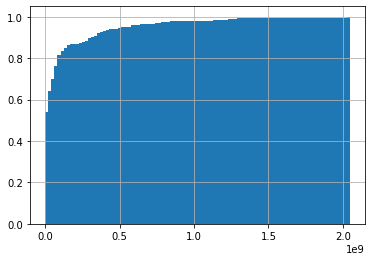

In [209]:
ser = df_revenue.set_index('release_date')
df_revenue['revenue'].hist(cumulative=True, density=1, bins=100)

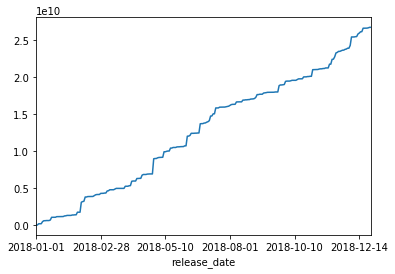

In [217]:
ser['revenue'].sort_index().cumsum().plot()

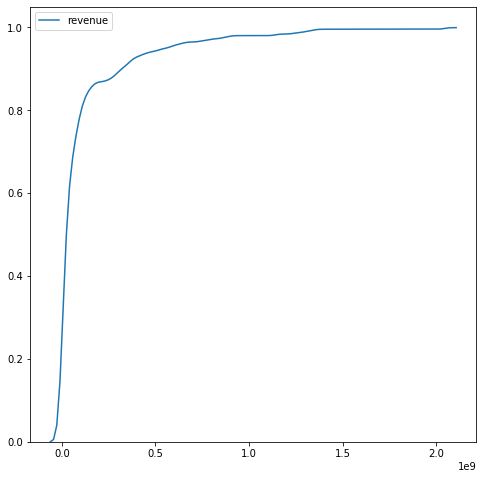

In [218]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.kdeplot(ser['revenue'], cumulative=True)

In [226]:
df_quarter1 = df_revenue[df_revenue['quarter'] == 1]
df_quarter2 = df_revenue[df_revenue['quarter'] == 2]
df_quarter3 = df_revenue[df_revenue['quarter'] == 3]
df_quarter4 = df_revenue[df_revenue['quarter'] == 4]

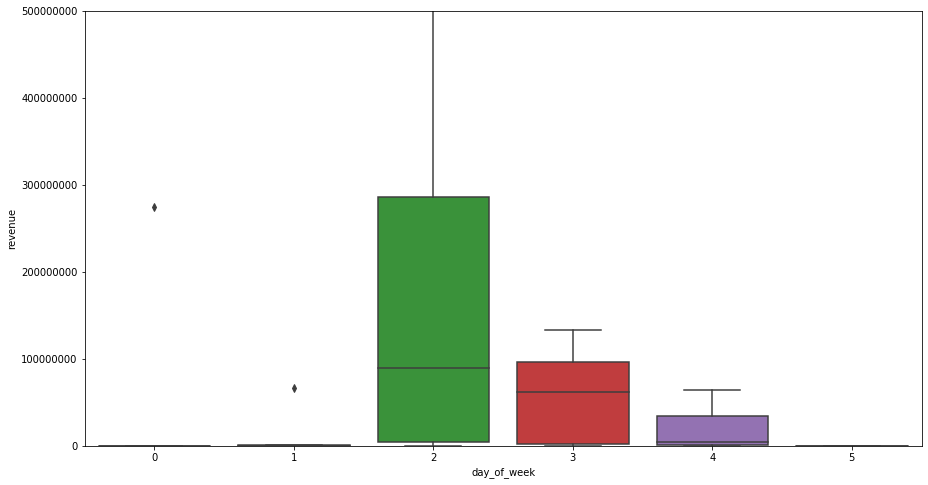

In [223]:
plt.figure(figsize=(15,8))
plt.ylim(top=500000000)
plt.ticklabel_format(style='plain')
sns.boxplot(x="day_of_week", y="revenue", data=df_quarter1)

(0.4457833170890808, 1.5465218607010845e-15)

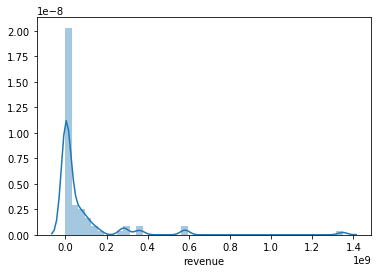

In [230]:
stats.shapiro(df_quarter1['revenue'])
sns.distplot(df_quarter1['revenue'])
stats.shapiro(df_quarter1['revenue'])

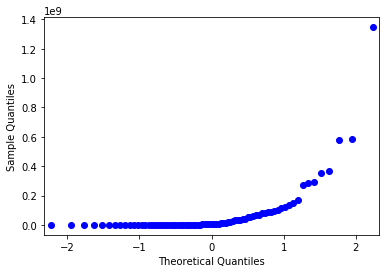

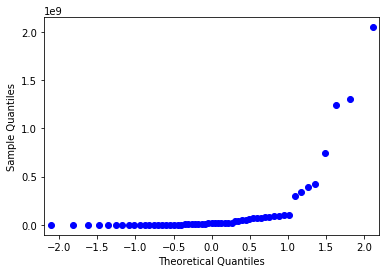

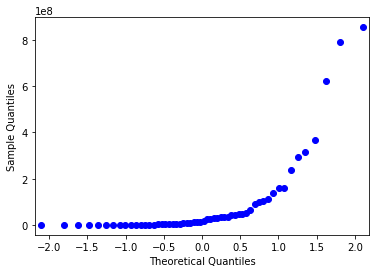

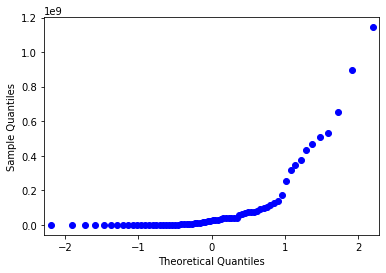

In [229]:
sm.qqplot(df_quarter1['revenue'])
sm.qqplot(df_quarter2['revenue'])
sm.qqplot(df_quarter3['revenue'])
sm.qqplot(df_quarter4['revenue'])
pylab.show()